<img src='../frameworks/img/EU-Copernicus-EUM-WEKEO_banner_logo.png' align='right' width='75%'></img>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_2_OLCI_file_structure.ipynb">Understanding OLCI product structure >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://trainhub.eumetsat.int/ocean/sensors/1_1_OLCI_data_access.ipynb"><img src="https://img.shields.io/badge/Launch-TrainHub-Blue.svg" alt="Open in TrainHub"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://mybinder.org/v2/gl/eumetlab%2Focean%2Fsensors%2Flearn-olci/main?labpath=1_OLCI_introductory/1_1_OLCI_data_access.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://colab.research.google.com/github/eumetlab/ocean/sensors/learn-olci/blob/main/1_OLCI_introductory/1_1_OLCI_data_access.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://studiolab.sagemaker.aws/import/github/eumetlab/ocean/sensors/learn-olci/blob/main/1_OLCI_introductory/1_1_OLCI_data_access.ipynb"><img src="https://studiolab.sagemaker.aws/studiolab.svg" alt="Open In Studio Lab"/></a></div>
    <div style="float:left"><p>&emsp;</p></div>
    <div style="float:left"><a href="https://pccompute.westeurope.cloudapp.azure.com/compute/hub/user-redirect/git-pull?repo=https://github.com/eumetlab/ocean/sensors/learn-olci&urlpath=1_OLCI_introductory/1_1_OLCI_data_access.ipynb&branch=main"><img src="https://img.shields.io/badge/Open-Planetary%20Computer-black?style=flat&logo=microsoft" alt="Open in Planetary Computer"/></a></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn OLCI: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **[A WEkEO account](https://my.wekeo.eu/user-registration)** if you are using or plan to use WEkEO
- **[A EUMETSAT Earth Observation Portal account](https://eoportal.eumetsat.int/)** if you are using or plan to use the EUMETSAT Data Store or CODA
  

There are no prerequisite notebooks for this module.
</div>
<hr>

# 1.1 Accessing OLCI data 

### Data used

| Product Description  | Data Store collection ID|  WEkEO HDA ID | Product Navigator |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|
| Sentinel-3 OLCI level-1B Full resolution | EO:EUM:DAT:0409 | EO:EUM:DAT:SENTINEL-3:OL_1_EFR___ | [link](https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:OL_1_EFR___NTC?query=OLCI&filter=satellite__Sentinel-3&filter=instrument__OLCI&filter=processingLevel__Level%201%20Data&s=advanced) |
| Sentinel-3 OLCI level-2 full resolution  | EO:EUM:DAT:0407 | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | [link](https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC?query=OLCI&filter=satellite__Sentinel-3&filter=instrument__OLCI&filter=processingLevel__Level%202%20Data&s=advanced) |
| Sentinel-3 OLCI level-2 reduced resolution | EO:EUM:DAT:0408 | WEkEO: EO:EUM:DAT:SENTINEL-3:OL_2_WRR___ | [link](https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:OL_2_WRR___NTC?query=OLCI&filter=satellite__Sentinel-3&filter=instrument__OLCI&filter=processingLevel__Level%202%20Data&s=advanced) |

### Learning outcomes

At the end of this notebook you will know;
* which <font color="#138D75">**web portals**</font> you can use to access OLCI data
* how to download data from the EUMETSAT Data Store using the <font color="#138D75">**eumetsat data access (eumdac)**</font> client
* how to download data from WEkEO using the <font color="#138D75">**harmonised data access (hda)**</font> client

### Outline

Data from OLCI is available through multiple sources, either via a web user interface (WebUI) or through code and command line interfaces with an Application Programming Interface (API). WebUIs are useful for accessing quick-look data visualisations, and for browsing to see what is available. APIs are more useful for routine, automated and operational data access. Here we will guide you through ways you can access OLCI data through both methods.

Users should note that this notebook will use APIs to download <font color="#138D75">**all**</font> of the products required for the lessons in the OLCI introductory module. However, there is <font color="#FF0000">**no need to run both**</font> the [Downloading via the Data Store API](#Data_Store_API) and [Downloading via the WEkEO API](#WEKEO_API) sections as they achieve the same goal, via different means. Which option you choose, depends on where you are working (locally, or on a hosted JupyterHub such a that on WEkEO), and (more generally speaking), whether you are wanting to make multiple calls to the same API. If you were working with OLCI and other data served by EUMETSAT, the Data Store may be your preferred choice. If you are working with OLCI and other Copernicus data (such as that from the Copernicus Marine Service), the WEkEO API may serve you better. Users working within the WEkEO environment (JupyterHub or virtual machine) should opt for the [Downloading via the WEkEO API](#WEKEO_API) approach, as this will be faster.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Download data via GUIs](#section1)
 1. [The products we need](#section2)
 1. [Downloading via the Data Store API](#section3)
 1. [Downloading via the WEkEO API](#section4)

<hr>

In [1]:
import configparser
import shutil
import os
import json
import zipfile
import eumdac #for downloading via the eumetsat/data-store
from hda import Client #for downloading via wekeo
from IPython.display import YouTubeVideo, HTML

# load config
config = configparser.ConfigParser()
config.read(os.path.join(os.path.dirname(os.getcwd()),"frameworks","config.ini"))

# Create a download directory for our OLCI products
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Downloading data via GUIs
[Back to top](#TOC_TOP)

</div>

### The EUMETSAT Data Store

The [Data Store](https://data.eumetsat.int) is EUMETSAT's primary pull service for delivering data, including the ocean data available from Sentinel-3 and OLCI. 

Access to it is possible through a WebUI, and through a series of application programming interfaces (APIs). The Data Store supports browsing, searching and downloading data as well as subscription services. It also provides a link to the online version of the [EUMETSAT Data Tailor](https://tailor.eumetsat.int/) for customisation. The video below provides an overview of the Data Store WebUI.

The video below explains how you can access data through the EUMETSAT Data Store WebUI. You can visit and see if you can find OLCI data to download, however this notebook will also show you how to access the Data Store API, facilitated by the EUMDAC client (see the [Downloading via the Data Store API](#section3) section, below).
#### Links:

* [EUMETSAT Data Store](https://data.eumetsat.int)
* [More information on the Data Store](https://eumetsatspace.atlassian.net/wiki/spaces/DSDS/overview)

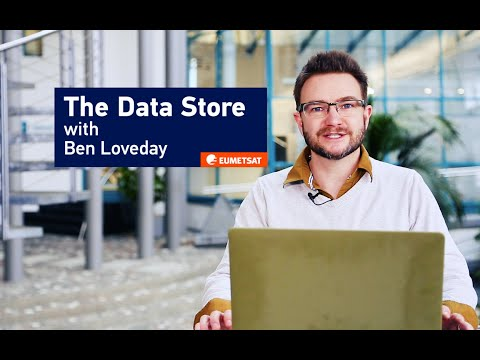

In [2]:
YouTubeVideo('WINakzAZvxw', width=config["nbook"]["v_wd"], height=config["nbook"]["v_ht"])

<hr>

### WEkEO

WEkEO is the Copernicus Data Information and Access Service (DIAS) reference service for environmental data. It is a partnership between EUMETSAT, the European Centre for Medium-range Weather Forecasting (ECMWF), Mercator Ocean International, and the European Environment Agency (EEA). You can see an overview of the WEkEO service offering in the video below. WEkEO offers a harmonised data access (HDA) solution to a wide range of Copernicus data, including that from Sentinel-3 and associated down-stream products from the Copernicus Marine Service. The WEkEO HDA can be accessed via the [WEkEO Data Viewer](https://www.wekeo.eu/data) and through an API, see [Downloading from WEkEO via the API](#section4).

You can visit the [WEkEO Data Viewer](https://www.wekeo.eu/data) and explore the available marine data, however this notebook will also show you how to use the HDA API - see [Downloading from WEkEO via the API](#section4) below.

#### Links:
* [WEkEO Data Viewer](https://www.wekeo.eu/data)
* [More information on WEkEO](https://www.wekeo.eu/docs)

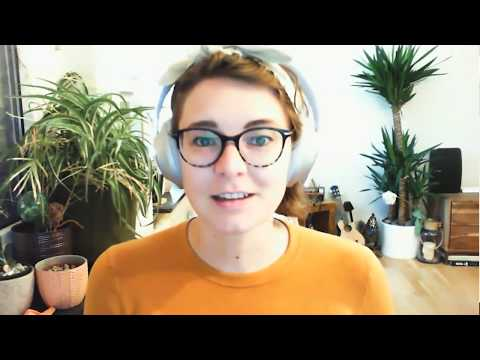

In [3]:
YouTubeVideo('UOexmq1LdyY', width=config["nbook"]["v_wd"], height=config["nbook"]["v_ht"])

<hr>

### The Copernicus Online Data Access (CODA) Portal

The [Copernicus Online Data Access (CODA)](https://coda.eumetsat.int) portal will continue to serve Sentinel-3 data while data is transferred to the new EUMETSAT Data Store. It can be accessed via a WebUI and programmatically using an API (see example code on the [EUMETSAT GitLab](https://gitlab.eumetsat.int/eumetlab/cross-cutting-tools/sentinel-downloader)). 

In this notebook we won't use CODA but if you are searching for data on the EUMETSAT Data Store or WEkEO and find it is unavailable, it may be available via CODA, [CODAREP (for reprocessed data)](https://codarep.eumetsat.int), or the EUMETSAT [Data Centre Archive](https://archive.eumetsat.int). 

The video below shows how to use the CODA WebUI to search for, and download, OLCI data.

#### Links:

* [CODA](https://coda.eumetsat.int)
* [More information on CODA](https://coda.eumetsat.int/manual/CODA-user-manual.pdf)

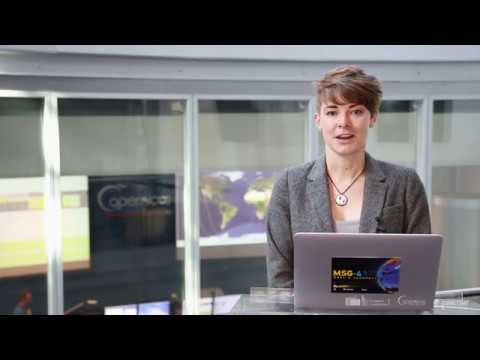

In [4]:
YouTubeVideo('V3NAuafvlFM', width=config["nbook"]["v_wd"], height=config["nbook"]["v_ht"])

<div class="alert alert-info" role="alert">

## 2. <a id='section2'></a>The products we need for this module
[Back to top](#TOC_TOP)
    
</div>

We need a number of OLCI level-1b and level-2 products for the notebooks within the introductory part of the learn-olci module. These products are shown below in a python `list` called *product list*. We can retrieve these products from either the Data Store or the WEkEO product catalogue.

In [5]:
product_list = [
'S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3',
'S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3',
'S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3'
]

<hr>
<div class="alert alert-info" role="alert">

## 3. <a id='section3'></a>Downloading from the Data Store via API
[Back to top](#TOC_TOP)

</div>

The first option you can use to access OLCI data for these notebooks, is the [EUMETSAT Data Store](https://data.eumetsat.int). We will use a data access client called "EUMDAC" - the EUMETSAT Data Access Client to access the data. You should have installed the client following the environment yml file associated to the learn-olci repository, but you can also find the source code on the [EUMETSAT gitlab](https://gitlab.eumetsat.int/eumetlab/data-services/eumdac).Visit the EUMETSAT user support confluence spaces for the the [Data Store](https://eumetsatspace.atlassian.net/wiki/spaces/DSDS/overview) and [EUMDAC](https://eumetsatspace.atlassian.net/wiki/spaces/EUMDAC/overview).

If you are working in WEkEO, please skip to [section 4](section_4).


In order to allow us to download data from the Data Store via API, we need to provide our credentials. To do this, we need to create a file called `.eumdac_credentials` in our home directory. For most computer systems the home directory can be found at the path \user\username, /users/username, or /home/username depending on your operating system.

In this file we need to add the following information exactly as follows;

```
{
"consumer_key": "<your_consumer_key>",
"consumer_secret": "<your_consumer_secret>"
}
```

You must replace `<your_consumer_key>` and `<your_consumer_secret>` with the information you extract from https://api.eumetsat.int/api-key/. You will need a [EUMETSAT Earth Observation Portal account](https://eoportal.eumetsat.int/) to access this link, and in order to see the information you must click the "Show hidden fields" button at the bottom of the page.

*Note: your key and secret are permanent, so you only need to do this once, but you should take care to never share them*

Once you have done this, you can read in your credentials using the commands in the following cell. These will be used to generate a time-limited token, which will refresh itself when it expires.

In [6]:
with open(os.path.join(os.path.expanduser("~"),'.eumdac_credentials')) as json_file:
    credentials = json.load(json_file)
    token = eumdac.AccessToken((credentials['consumer_key'], credentials['consumer_secret']))
    print(f"This token '{token}' expires {token.expiration}")

This token '141304e4-7a69-37eb-bb25-c15e4336f403' expires 2022-02-17 09:45:22.477518


Now we have a token, we can see what OLCI specific collections we have in the Data Store.

In [7]:
datastore = eumdac.DataStore(token)
for collection_id in datastore.collections:
    if "OLCI" in collection_id.title:
        print(f"Collection ID({collection_id}): {collection_id.title}")

Collection ID(EO:EUM:DAT:0407): OLCI Level 2 Ocean Colour Full Resolution - Sentinel-3
Collection ID(EO:EUM:DAT:0409): OLCI Level 1B Full Resolution - Sentinel-3
Collection ID(EO:EUM:DAT:0410): OLCI Level 1B Reduced Resolution - Sentinel-3
Collection ID(EO:EUM:DAT:0408): OLCI Level 2 Ocean Colour Reduced Resolution - Sentinel-3
Collection ID(EO:EUM:DAT:SENTINEL-3:OL_1_ERR___): OLCI Level 1B Reduced Resolution in NTC - Sentinel-3
Collection ID(EO:EUM:DAT:SENTINEL-3:OL_1_EFR___): OLCI Level 1B Full Resolution in NTC - Sentinel-3
Collection ID(EO:EUMVAL:DAT:0407): OLCI Level 2 Ocean Colour Full Resolution - Sentinel-3 (VAL)
Collection ID(EO:EUMVAL:DAT:0409): OLCI Level 1B Full Resolution - Sentinel-3 (VAL)


So, for;
* **OLCI Level 1B Full Resolution** we want `collection_id`: **EO:EUM:DAT:0409**.
* **OLCI Level 2 Ocean Colour Reduced Resolution** we want `collection_id`: **EO:EUM:DAT:0408**
* **OLCI Level 2 Ocean Colour Full Resolution** we want `collection_id`: **EO:EUM:DAT:0407**

Lets get some level-1B data first. Below we provide the level-1B `collection_id` to our `datastore` object to choose the correct collection.

In [8]:
collection_id = 'EO:EUM:DAT:0409'
selected_collection = datastore.get_collection(collection_id)

In this case, as we already know what product we want, we can now find the product directly using the **product name**. which in this case the first item in our product list. 

In [9]:
selected_product = datastore.get_product(product_id=product_list[0], collection_id=collection_id)

For more advanced search options using EUMDAC see the notebook on [OLCI advanced data access](../2_OLCI_advanced/2_1_OLCI_advanced_data_access_eumdac.ipynb).

Now we can download the product. It will go into our download directory *(../products)*.

In [10]:
with selected_product.open() as fsrc, open(os.path.join(download_dir, fsrc.name), mode='wb') as fdst:
    print(f'Downloading {fsrc.name}')
    shutil.copyfileobj(fsrc, fdst)
    print(f'Download of product {fsrc.name} finished.')

Download of product S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3.zip finished.


The product is downloaded as a zip file, so lets unzip it and remove the zip.

In [11]:
with zipfile.ZipFile(fdst.name, 'r') as zip_ref:
    for file in zip_ref.namelist():
        if file.startswith(str(selected_product)):
            zip_ref.extract(file, download_dir)
    print(f'Unzipping of product {selected_product} finished.')
os.remove(fdst.name)

Unzipping of product S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3 finished.


You can now check the **products** directory to see that we have the level 1B file. Now, lets pull all the parts together and download both level 2 files in a single loop.

In [12]:
collection_ids = ["EO:EUM:DAT:0408", "EO:EUM:DAT:0407"]

for product_id, collection_id in zip(product_list[1:],collection_ids):
    print(f"Retrieving: {product_id}")    

    selected_collection = datastore.get_collection(collection_id)
    selected_product = datastore.get_product(product_id=product_id, collection_id=collection_id)
    
    with selected_product.open() as fsrc, open(os.path.join(download_dir, fsrc.name), mode='wb') as fdst:
        print(f'Downloading {fsrc.name}.')
        shutil.copyfileobj(fsrc, fdst)
        print(f'Download of product {fsrc.name} finished.')

    with zipfile.ZipFile(fdst.name, 'r') as zip_ref:
        for file in zip_ref.namelist():
            if file.startswith(str(selected_product)):
                zip_ref.extract(file, download_dir)
        print(f'Unzipping of product {fdst.name} finished.')

    os.remove(fdst.name)

Retrieving: S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3
Download of product S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3.zip finished.
Unzipping of product /Users/benloveday/Code/Git_Reps/CMTS/sensors/learn-olci/1_OLCI_introductory/products/S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3.zip finished.
Retrieving: S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3
Download of product S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3.zip finished.
Unzipping of product /Users/benloveday/Code/Git_Reps/CMTS/sensors/learn-olci/1_OLCI_introductory/products/S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3.zip finished.


If you have completed this section, you can now continue to work through the rest of the notebooks in this repository and learn more about working with OLCI data. Alternatively, if you'd like to learn more about using the advanced functionality of EUMDAC to access OLCI data you can check out the advanced workflows in the <a href="../2_OLCI_advanced/2_1_OLCI_advanced_data_access_eumdac.ipynb">Advanced data access with **eumdac**</a> notebook. 

If you're interested in, or currently working on, WEkEO, please continue to [section 4](section_4).


<hr>
<div class="alert alert-info" role="alert">

## 4. <a id='section4'></a>Downloading from WEkEO via the API
[Back to top](#TOC_TOP)

</div>


Downloading from WEkEO harmonised data access (HDA) API is facilitated by another data access client. 
If you are currently working on the WEkEO JupyterHub, this client will already be installed. Otherwise, as with EUMDAC, if you have followed the installation guidelines in the yml file provided with this repository, you will also have the client installed. If not, you can find the source code [here](https://github.com/ecmwf/hda).

In order to allow us to download data using the WEkEO HDA API, we need to provide our credentials. To do this, we need to create a file called `.hdarc` in our home directory. For most computer systems the home directory can be found at the path \user\username, /users/username, or /home/username depending on your operating system. In this file we need to add the following information exactly as follows;

```
url: https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker
user: <your_user_name>
password: <your_password>
```

You must replace `<your_user_name>` and `<your_password>` with the information from your WEkEO account (if you don't have one yet, register [here](https://www.wekeo.eu/). Once you have entered these credentials in the file, the `hda` client will automatically read in the credentials from the file when you use it.

To begin, we should establish an instance of the client.

In [13]:
c = Client()

The WEkEO HDA client accepts requests as JSON queries. These have a specific format, which may look complex, but you can build on the examples you can find in the GUI, available under the **Show API request** button;

<img src='..\img\WEkEO_show_api_OLCI.png' align='centre' width='75%'></img>


WEkEO allows you to search for data in time and space, but not by product name. However, we can work around this by providing the exact time stamps for our data. Below, we have a query for the first item in our product list, the OLCI level 1B product. You can see that the start and end times match the filename times, and the `producttype`, and `timeliness` correspond to those in the earlier specified filename too.

In [14]:
query = {
  "datasetId": "EO:EUM:DAT:SENTINEL-3:OL_1_EFR___",
  "dateRangeSelectValues": [
    {
      "name": "position",
      "start": "2021-07-17T10:10:14.000Z",
      "end": "2021-07-17T10:10:16.000Z"
    }
  ],
  "stringChoiceValues": [
    {
      "name": "producttype",
      "value": "OL_1_EFR___"
    },
    {
      "name": "timeliness",
      "value": "Non Time Critical"
    }
  ]
}

This next section of code prints the names of the files that have been found during the search...

In [15]:
matches = c.search(query)
for match in matches.results:
    fdst = match['filename']
    print(f"Found: {fdst}")

Found: S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002


We can see that we have found the file we are interested in, so the next section of code can be used to download it...

In [16]:
matches.download()

2022-02-17 08:46:15,951 INFO Downloading https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/dataorder/download/i_F6DPkyOd1CUT1bjYhkwmTSD5Y to S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002 (608.3M)
2022-02-17 08:46:30,277 INFO Download rate 42.5M/s                                                                                                                                                                                                            


Finally, we can unzip the file.

In [17]:
with zipfile.ZipFile(fdst, 'r') as zip_ref:
    zip_ref.extractall(download_dir)
    print(f'Unzipping of product {fdst} finished.')
os.remove(fdst)

Unzipping of product S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002 finished.


Now lets download our other two products. We will need to set up query files for both.

In [18]:
query_WRR = {
  "datasetId": "EO:EUM:DAT:SENTINEL-3:OL_2_WRR___",
  "dateRangeSelectValues": [{"name": "position", "start": "2021-07-17T09:57:31.000Z", "end": "2021-07-17T09:57:33.000Z"}],
  "stringChoiceValues": [{"name": "producttype", "value": "OL_2_WRR___"}, {"name": "timeliness", "value": "Non Time Critical"}]
}

query_WFR = {
  "datasetId": "EO:EUM:DAT:SENTINEL-3:OL_2_WFR___",
  "dateRangeSelectValues": [{"name": "position", "start": "2021-07-17T10:10:14.000Z", "end": "2021-07-17T10:10:16.000Z"}],
  "stringChoiceValues": [{"name": "producttype", "value": "OL_2_WFR___"}, {"name": "timeliness", "value": "Non Time Critical"}]
}

queries = [query_WRR, query_WFR]

And again we can search for, and download the results...

In [19]:
for query in queries:
    matches = c.search(query)
    matches.download()
    for match in matches.results:
        fdst = match['filename']
        print(f"Found: {fdst}")        
        with zipfile.ZipFile(fdst, 'r') as zip_ref:
            zip_ref.extractall(download_dir)
            print(f'Unzipping of product {fdst} finished.')
        os.remove(fdst)

2022-02-17 08:46:42,571 INFO Downloading https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/dataorder/download/EvcU1RaNKf_YMMa6h9SRSBl0HDA to S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003 (344.5M)
2022-02-17 08:46:51,178 INFO Download rate 40M/s                                                                                                                                                                                                              


Found: S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003
Unzipping of product S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003 finished.


2022-02-17 08:47:15,957 INFO Downloading https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/dataorder/download/pvJlYX5tYlJKYCmwsdTE4pdq6GU to S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003 (338.7M)
2022-02-17 08:47:24,075 INFO Download rate 41.7M/s                                                                                                                                                                                                            


Found: S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003
Unzipping of product S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003 finished.


You can now continue to work through the rest of the notebooks in this repository and learn more about working with OLCI data. Alternatively, if you'd like to learn more about using the advanced functionality of the WEkEO HDA API to access OLCI data you can check out the advanced workflows in the <a href="../2_OLCI_advanced/2_2_OLCI_advanced_data_access_hda.ipynb">Advanced data access with the WEkEO **HDA**</a> notebook.

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_2_OLCI_file_structure.ipynb">Understanding OLCI product structure >></a>

<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>